# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: w207 Machine Learning



# 

## **Table of Contents:**

#### **Project Summary**

#### **Description of Data and Data source**

#### **Installations and Libraries**

#### **Dataset Exploratory Analysis**

>Format of Data

>Summmary Statistics


#### **Step-By-Step performance of algorithms**

>...

>...



#### **Conclusion**
#### **Further work for final submission**



# 

# Project Overview

## **Motivation**:
How much would you pay for a house? That is often one of the hardest questions to answer. When buying a house or selling a house, it is very crucial to determine the right pricing, since house prices change over time and each house its own "$ rating". 

Three main aspects determine the price of a house. 
1. Condition
2. Features (Number of rooms, square footage etc)
3. Location
    
These 3 properties can be defined under a large set of sub-properties. The **Ames Housing dataset** was compiled by **Dean De Cock**, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This data set (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) is being used for this project to demonstrate the use of various Machine Learning techniques, to be able to have the algorithm perform the difficult task of deciding what the house price should be. 

 
## **Baseline Project Goals**: Through this baseline project we are trying to answer 3 main questions:
1. What combination of aspects of a house most determines the sale-price?
2. Can Regression based prediction be used to estimate the price of the house?
3. What is the best accuracy that can be achieved by using such algorithms?


## **Baseline Overall Strategy**: The general strategy we followed to come to the conclusion has been:
1. Thorough review of the description of data provided (including background research)
2. Reviewing ALL of the variables, in order to avoid omitted variable bias. 
3. Making a list of ordinal, categorical parameters that seem to be strongly correlated, to be used in decision tree based algorithms for later stages of project including final submission
4. EDA of ALL integer based paremeters
5. Shortlisting parameters that show strong trends and removing any categorical numerical variables
6. Perform Regression using only the shortlisted parameters
7. First pass accuracy assessment of basic linear regression without any data cleaning
8. Removing outliers, redoing linear regression, recalculating accuracy to show improvement


We have answered the above questions stated under "Baseline Project Goals" by Exploring the data (EDA) and performing Linear Regression on a selected set of parameters. The outcome is delailed below

## **Outcome**:

1. The 10 important parameters are: ...
2. Linear regression line fit can be obtained
3. Accuracy of prediction with a linear regression fit is >80%

## **Baseline Submission Content**:
For this baseline submission we show an overview of exploratory data analysis (EDA), and demonstrate the data  with sufficient visuals. We then set up a pipeline to demonstrate feasibility of using this data to perform prediction on house prices. 

In this report we have also included:

1. The format of the data
2. The various paremeters given
3. Distribution of the integer based parameters by visualization
4. Descripencies of those parameters and how those will effect us
5. Short listed parameters and justification for choice
6. Demonstration of a simple regression algorithm to show a regression fit
7. Visualizaion of regression line fit 
8. Visualization of actual vs predicted values to demonstrate fit
9. Accuracy estimates
10. Summary Statistics?
11. Conclusion
12. Further work
   

## **Further work**:
Feature engineering and advanced regression techniques

# Description of Data and Data Source

- **Data Source**:

- **Description of Data**:

In [44]:
"""
# New Section Heading:
"""

'\n# New Section Heading:\n'

In [45]:
"""

from IPython.display import Image, display

display(Image(filename='Images/Image1.png'))

"""

"\n\nfrom IPython.display import Image, display\n\ndisplay(Image(filename='Images/Image1.png'))\n\n"

# Code Base with outcomes and assesments

## Import all Libraries:

In [46]:
# This tells matplotlib not to try opening a new window for each plot.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from matplotlib.ticker import MultipleLocator
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import scipy.io as sio

%matplotlib inline



In [47]:
# download data file if it is not ready
data_path = 'data/train.csv'
data_file = Path(data_path)
if data_file.is_file():
    print("Datafile is already loaded.")
else:
    !mkdir 'data/'
    !curl - L "https://drive.google.com/uc?export=download&id=1ortEJfmlpt9-dbg5f6cTDt5nicswf5wT" > 'data/test.csv'
    !curl - L "https://drive.google.com/uc?export=download&id=1EG5jP5RDEIsNAMaF2m42KOyz-ZVjC8wS" > 'data/train.csv'
df = pd.read_csv(data_path)

Datafile is already loaded.


In [48]:
# lock the seed to have repeatable results
random.seed(100)

## Split training data into our own train and test data:
#### The "test.csv" is an unlabelled set. Therefore in order to assess performance we are splitting the train.csv into our own training, development and test set as needed
#### We are using split() to ensure random distribution of data points
#### We are starting off with ~10% of the train set into a test group

In [49]:
# Create train, dev, test datasets
# for features we do not need Id and we need to remove SalesPrice
df_X = df.drop(['SalePrice', 'Id'], axis=1)
df_y = df[['SalePrice']].copy()
# split data into Test and train
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.10, random_state=1)

# TODO split more to dev set if needed!


In [50]:
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')
print(type(df))
print(type(X_train))
X_train.head()

X_train size: (1314, 79), X_test size: (146, 79)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


## Initial Look at the data:
1.  Our **train** set now is **1314 long** (1314 labelled houses)
2.  Our **test** set now is **146 long** (146 labelled houses)
3.  Each house has **79 features**. 
4.  Features are a mix of **nominal, ordinal and categorical**
5.  We will have to be cognisant of the different data types for ALL our assessments

In [51]:
print(f'yy_train size: {y_train.shape}, y_test size: {y_test.shape}')
y_train.head()

yy_train size: (1314, 1), y_test size: (146, 1)


,SalePrice
418,126000
782,187100
1338,200000
931,117500
780,176000


## Initial Look at the data labels:
1. The label set only has one column **Sale Price**
2. Indexes match with the train set above
3. The train set and test set labels are of same lenght (1314 and 146 respectively)

## Taking a look at what the features are
Additionally reviewed the data_description.txt file. The column names and the names on the file correspond accurately

# First pass with Nominal values ONLY

First lets work on the nominal variables.

I would like to see how the data points are distributed, before any data cleaning

## Analysis on SalePrice

#### For SalePrice,  we use the mean price and variation range to determine whether we should seperate the sales price into before and after financial crisis. The observations are:
#### We do see a trend change from upward to decrease/flat in price 
#### However, the difference is only around 5% with a similar variation. As a result, in this stage, we keep it as is for cross sectional analysis. We might look into it further later.


In [52]:
#try to explore the impact of financial crisis to house prices#
df_train=y_train.merge(X_train, how="inner",left_index=True,right_index=True)
df_train[['SalePrice','YrSold']].groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,180787.411348
2007,186458.197952
2008,178579.735714
2009,179110.766447
2010,178996.129032


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

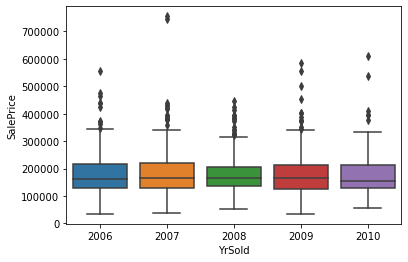

In [53]:
sns.boxplot(x= df_train['YrSold'], y= df_train['SalePrice'])

## For all the features, check whether there are variables with significant missing values. 

#### It looks like PoolQC , MiscFeature, Alley, Fence, FireplaceQu have substantial missing values
#### However, looking closer into the variables, the NA values just mean there is no such a feature. So we fill it with "NonExist" as a different category.

In [54]:
X_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1308
MiscFeature     1265
Alley           1230
Fence           1063
FireplaceQu      625
LotFrontage      233
GarageType        73
GarageYrBlt       73
GarageQual        73
GarageCond        73
GarageFinish      73
BsmtFinType2      35
BsmtExposure      35
BsmtCond          34
BsmtFinType1      34
BsmtQual          34
MasVnrArea         8
MasVnrType         8
Electrical         1
BedroomAbvGr       0
dtype: int64

In [55]:
# Check the descrptions and all missing values means the house does not have this feature. To 

X_train[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']]=X_train[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].fillna('NonExist')
X_train.isnull().sum().sort_values(ascending=False).head(20)

/home/pmotameni/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


LotFrontage     233
GarageYrBlt      73
GarageType       73
GarageFinish     73
GarageQual       73
GarageCond       73
BsmtExposure     35
BsmtFinType2     35
BsmtQual         34
BsmtCond         34
BsmtFinType1     34
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
dtype: int64

In [56]:
df_EDA=y_train.merge(X_train, how="inner",left_index=True,right_index=True)

## First step exploratory data analysis:

### We classify the features into two types of variables: Numerical and Categorical. 

### For all the numerical variables, we plot the correlations heatmap between the dependent variable SalePrice and all the features. 




In [57]:
## all numeric variables##
df_num_list=df_EDA.select_dtypes(exclude={'object'}).columns.to_list()

Text(0.5, 1.0, 'Correlation heatmap')

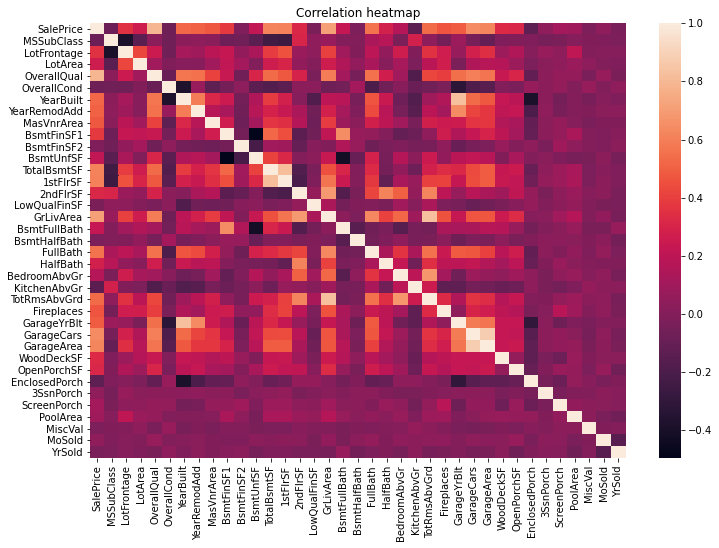

In [58]:
corr_matrix = df[df_num_list].corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.title("Correlation heatmap")

Text(0.5, 1.0, 'Top 15 heatmap')

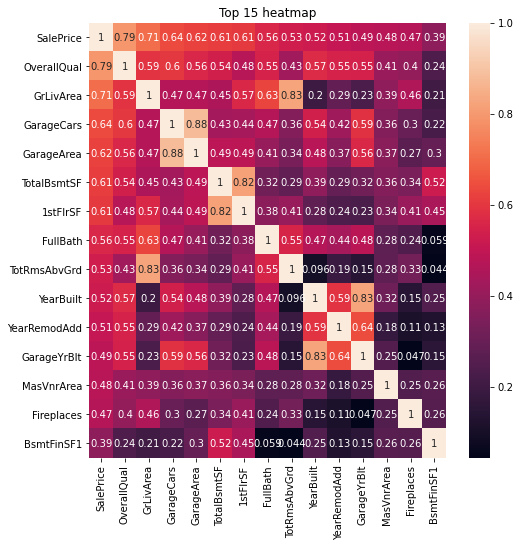

In [59]:
##Pick the top 15 correlated features##

top15_corr = corr_matrix.sort_values('SalePrice', ascending= False)[0:15]
top15_corr = top15_corr.loc[:, top15_corr.index]

fig = plt.figure(figsize= (8, 8))
sns.heatmap(top15_corr, annot= True)
plt.title("Top 15 heatmap")

## The correlations heatmap shows:


###  1. Below features are highly correlated with SalePrice: 

- 'OverallQual' 
- 'GrLivArea' 
- 'GarageCars' 
- 'GarageArea' 
- 'TotalBsmtSF' 
- '1stFlrSF' 
- 'FullBath' 
- 'TotRmsAbvGrd' 
- 'YearBuilt'
- 'YearRemodAdd'  

###  2. However, there are high correlations also between features themselves

-  OverallQual & most other variables
-  GrLivArea & TotRMAbvGrd &  FullBath 
-  GarageCares & GarageArea
-  TotalbsmtSF & 1stFlrSF
-  BsmtFinSF1 $ TotBsmtSF

## 3. First round for baseline features to include:

-  Yearbuilt 
-  YearRemodAdd 
-  GrLivArea 
-  TotalBsmtSF 
-  GarageCars

In [60]:
#all text variable (categorical)#
df_txt_list=df_EDA.select_dtypes(include={'object'}).columns.to_list()

### For all the categorical variables, we plot the box plots to see whether any category in the variable has a significant different SalePrice. We conclude as below:


In [61]:
df[df_txt_list].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [62]:
df[df_txt_list].shape

(1460, 43)

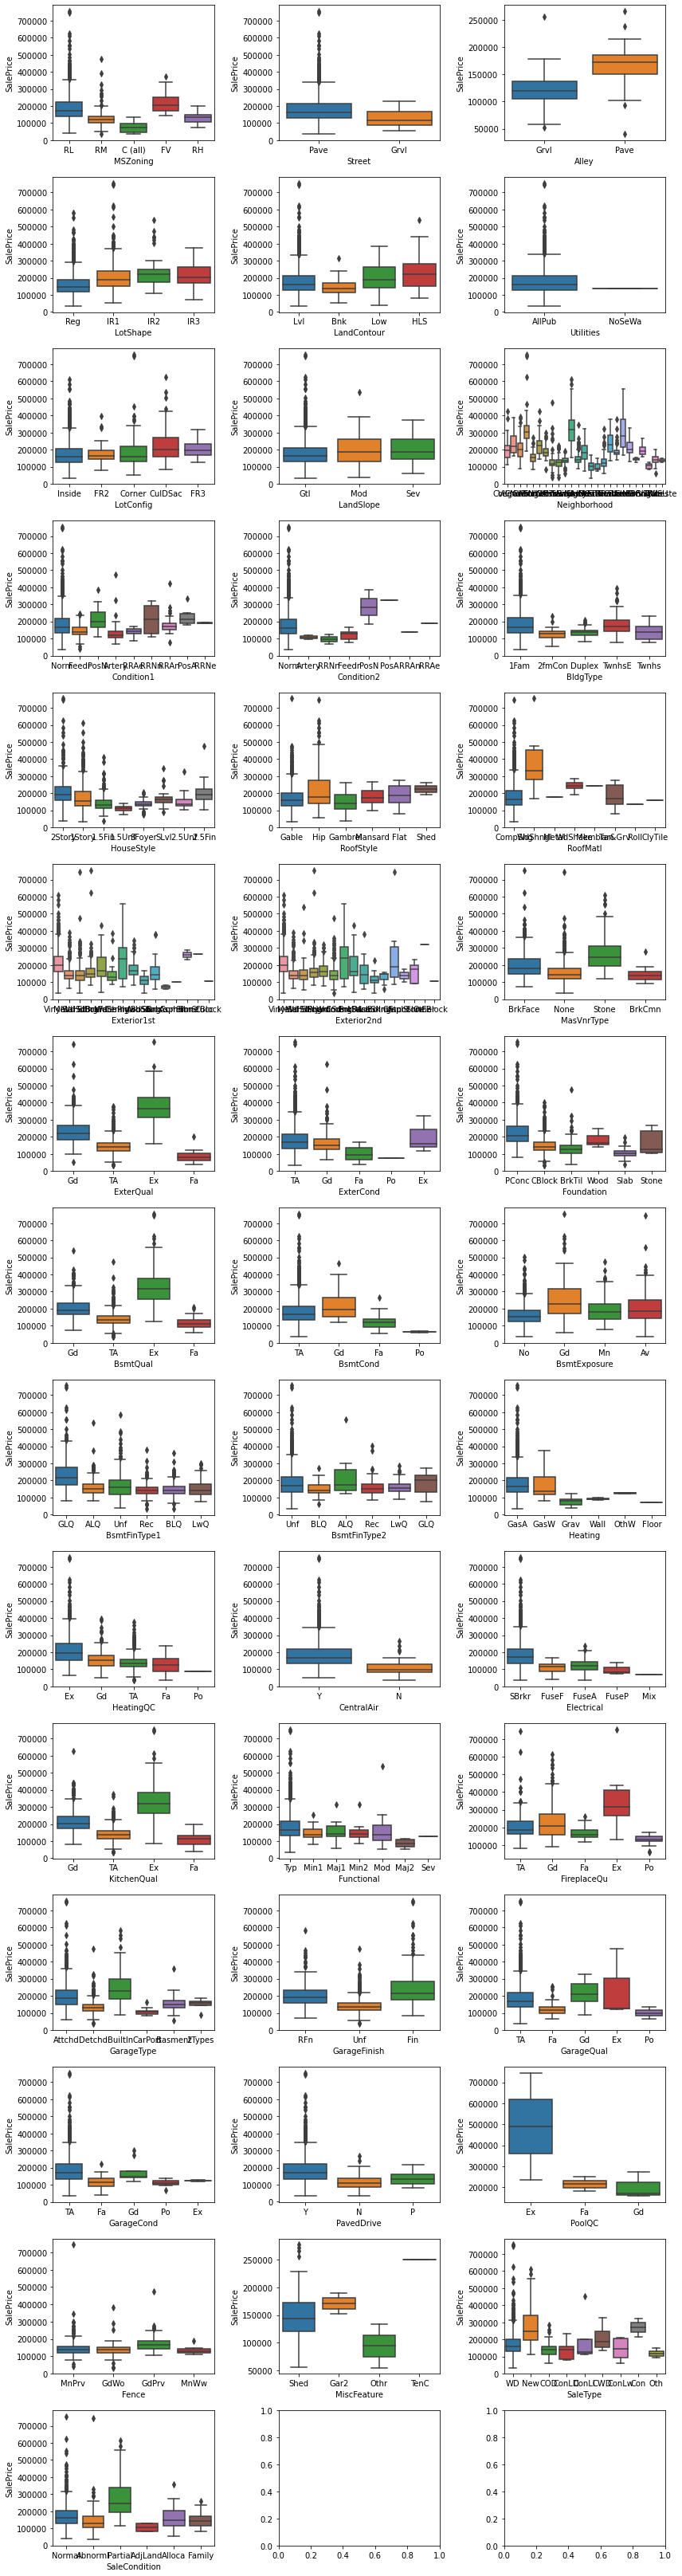

In [63]:
#box plot to explore categorical variables

n_rows=15
n_cols=3

fig, axs = plt.subplots(n_rows, n_cols, figsize= (4*n_cols, 3*n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        i = row * 3 + col
        if i >= len(df_txt_list):
            break
        variable = df_txt_list[i]
        sns.boxplot(x= df[variable], y= df['SalePrice'], ax= axs[row, col])
        
plt.tight_layout()
plt.show()

### For all the categorical variables, we plot the box plots to see whether any category in the variable has a significant different SalePrice. We conclude as below:

####  1. Below features are highly correlated with SalePrice: 


- The features related to location:

    1. Neighborhood: some neighborhoods have significant higher mean price.
    2. MSZoning: FV(Floating Village(FV) is a special area where a retirement community was developed and have a higher mean price. Commercial has low mean price. 
    3. Condition1/Condition2: if there are positive off-site facilities, the prices of properties are higher.


- Generally all "quality" features, when the quality is excellent or good, the prices is significantly higher.

    4. BsmtQual
    5. KitchenQual
    6. exterCond
    7. PoolQC


- Features related to the house:


    8. MasVnrType: Stone Veneer is higher. 
    9. GarageType:  BuiltIn is meaningfully higher


####  2. However, there are high correlations also between features themselves:

Such as all quality features, the quality with whether the house has heating and central air

#### 3. Some features we will further explore: 

    1. LandContour
    2. BldgType:  TwnhsE/TwnhsI  might have info but not obvious
    3. HouseStyle: has info but might be correlated with house sqft
    4. RoofMati: has significant difference in values but might also add noises
    5. 'ExterQual'/ 'ExterCond': check correlation with other quality
    6. BsmtExposure: Gd(good exposure) or No has significant differences in price. check correlation with BsmtQual
    7. BsmtFinType1:
    8. Exterior1st&2nd
    9. functional
    10. saletype: new construction is higher but correlated? with yr built
    11. SaleCondition'
    12. FireplaceQu
    13. Heating
    14. Central Air
    4. HeatingQual
    5. garageQual
#### 4. Below features we are not planning to include:
 'Street',
 'Alley',
 'LotShape',,
 'Utilities'
 'LotConfig',
 'LandSlope',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature'


## Plotting all the nominal values to take a look at the data distribution

In [64]:
#isolating all nominal value formats
#Using a list of python var types to filter through all the columns
#Initial nominal value list is "int_feature_list"

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

nominal_df = X_train.select_dtypes(include=numerics)

int_feature_list = nominal_df.columns.values.tolist()

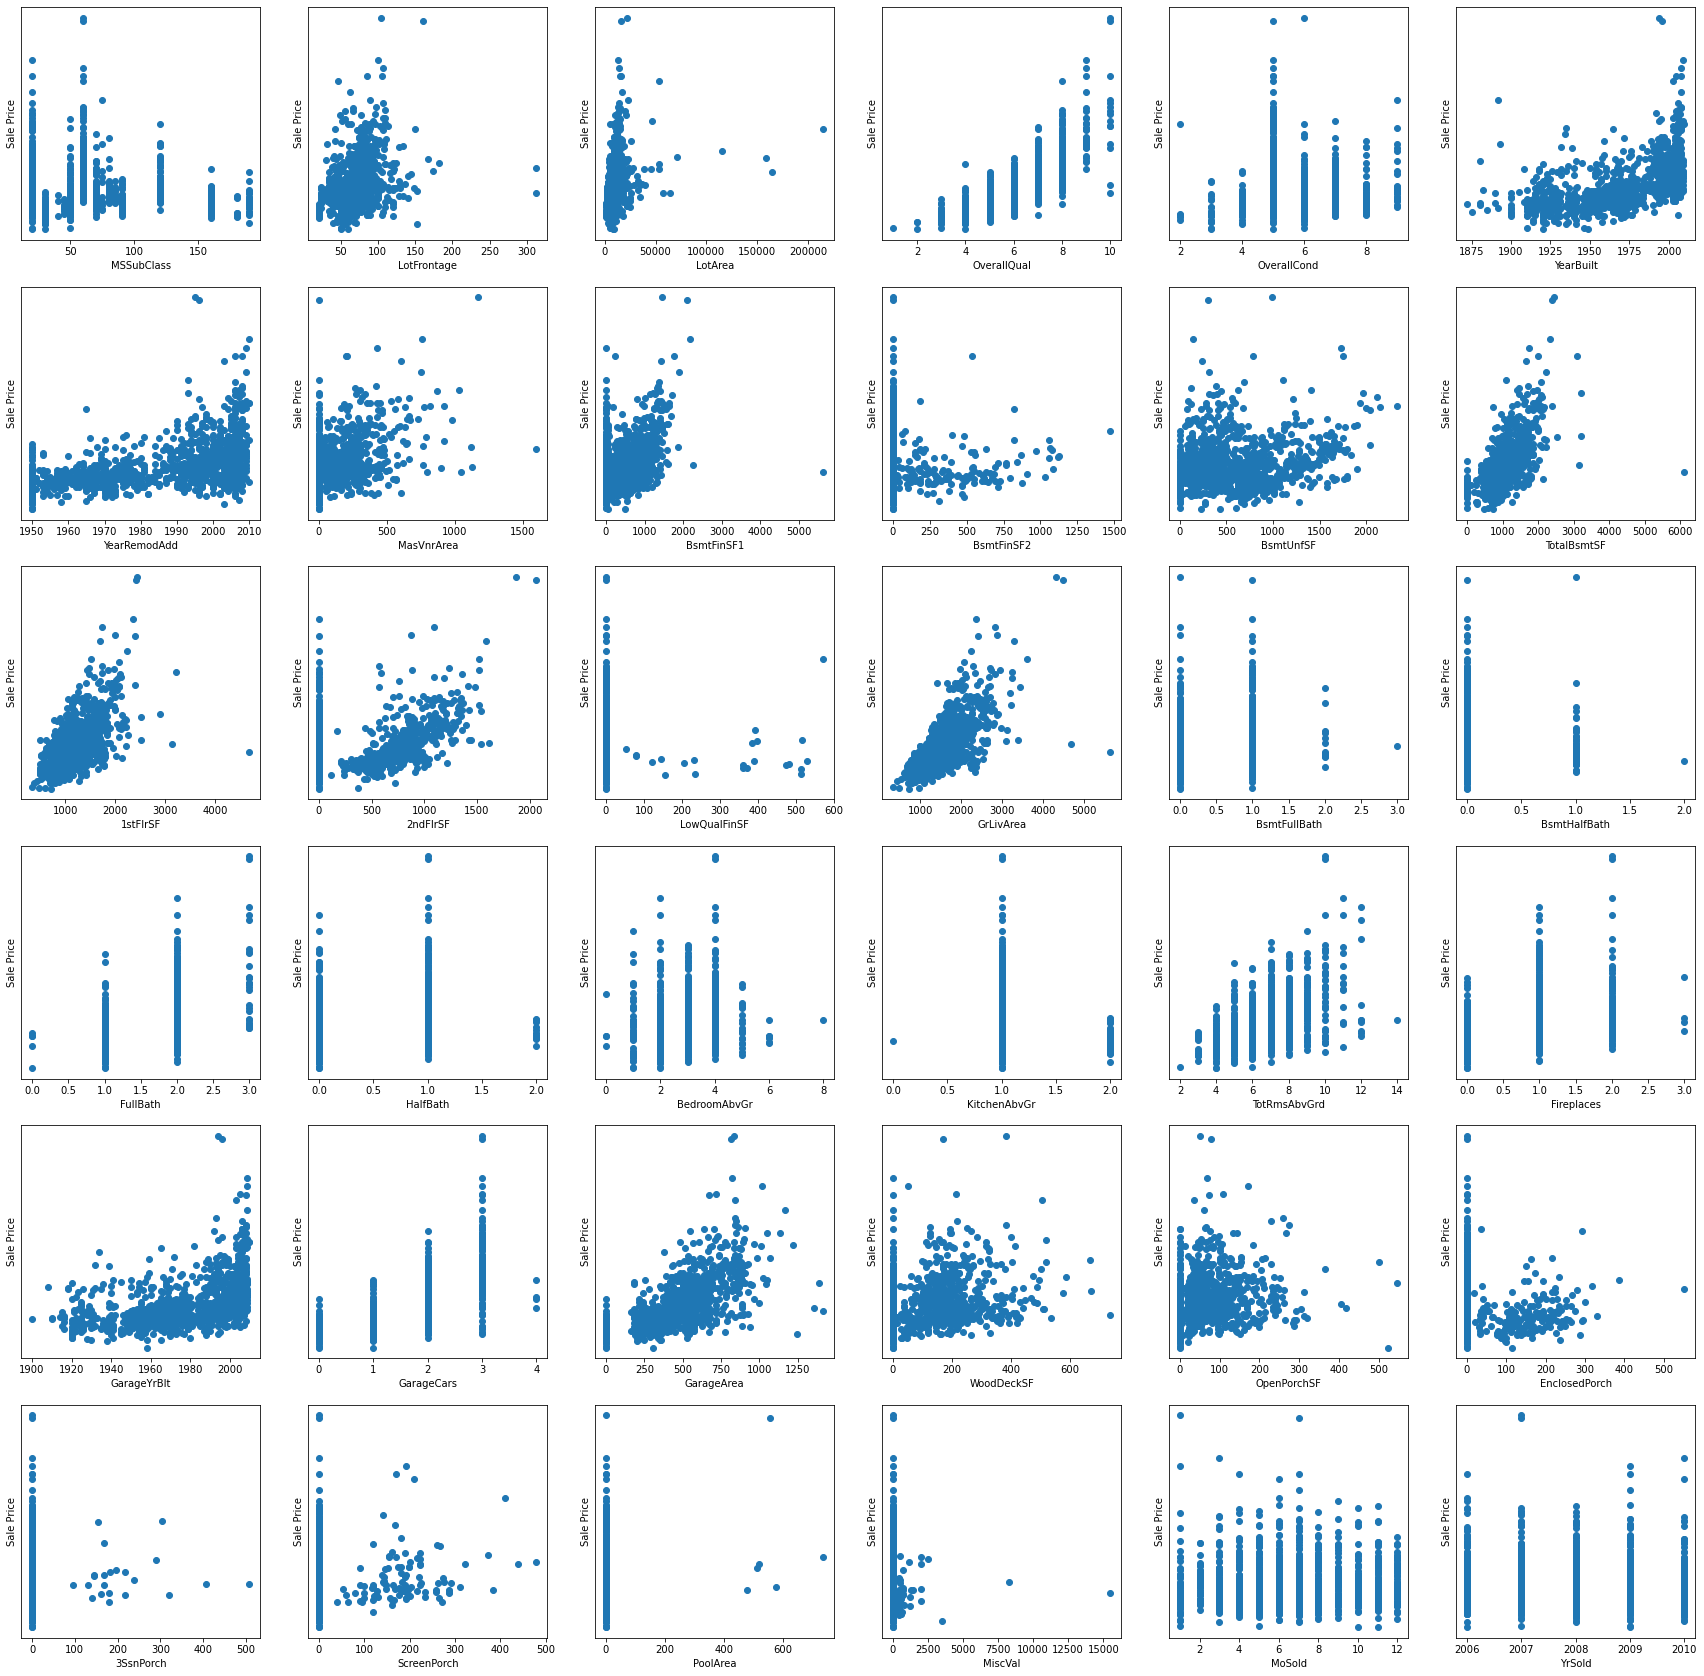

In [65]:
# Using the shortlisted feature list, run a for loop to plot all the data points
# int_feature_list has been created a few cells above
# int_feature_list contains all the columns that have some sort of numbers in them (int, float etc)

k=1
plt.figure(figsize=(30,30)) #Using a large figsize to make it easy to visualize everything

for feature in int_feature_list: 
    """ Looping through the int_feature_list
        plotting each of the columns from the train matrix on the horizontal axis
        against SalePrice (data labels) on the vertical axis
        in order to "view" any obvious correlation or non-correlation
    """
    output= ['SalePrice']
    plt.subplot(6, 6, k)
    plt.scatter(X_train[feature].values, y_train[output].values);
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.yticks([])
    k=k+1

plt.show()

# For each integer parameter make a first off decision on what needs to be done with that parameter

## 

### In this section we review ALL the variables. 
### We look at each plot above, as well as the description provided to us in data_description.txt
### We "plan ahead" what we could potentially do with each variable/feature
### However, we will not be including ALL of these features in our baseline evaluation
## 

1. **MSSubClass**: Identifies the type of dwelling involved in the sale.

Need to convert this to categorical, or ordinal. For Baseline we will not be using this. In terms of conversion to ordinal, this is not ordered currently. We will need to identify what criteria should be used to order these. However, this variable determines the type of property and is ultimately a critical feature that needs to be captured in the final ML algorithm.

2. **LotFrontage**: Linear feet of street connected to property

Need to remove values above 200. They are clearly outliers that are skewing the data on the right

Once we remove the outliers, we should see a good correlation, visually

3. **LotArea**: Lot size in square feet

This is an important parameter

However, looking at the scatter plot, I would say there are a few outliers that significantly skew the data

we should remove any values that are >50K and perform our final analysis.

Once we remove the outliers above 50k, we should get a reasonable correlation

4. **OverallQual**: Rates the overall material and finish of the house

Similar to the MSSubClass, this is actually a ordinal variable with a numerical rating. 

From the description.txt, it seems like it is ordered in the right way. 

5. **OverallCond**: Rates the overall condition of the house

Same feedback as OverallQual

6. **YearBuilt**: Original construction date

Can be used as-is for now. Keeping in mind, this is a time variable

7. **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

This is a tricky parameter. we need to figure out what to do with the data points where the house was not remodeled but is copying the construction date

Looking at the scatter plot, rest of the data points seem good. My only concern is the piling up of data on 1950

Also need to keep in mind this is a time variable

8. **MasVnrArea**: Masonry veneer area in square feet
Need to remove zero value 

Asses with  vs without Masonry veneer (consider using as binary variable in the final ML)
Then if with Masonry veneer, perform correlation assessment. 

9. **BsmtFinSF1**: Type 1 finished square feet
Need to remove zero values

Asses with basement vs without (consider using binary assessment)
Then if with basement, need to remove '0' values and perform correlation

10. **BsmtFinSF1**: Type 1 finished square feet, **BsmtFinSF2**: Type 2 finished square feet, **BsmtUnfSF**: Unfinished square feet of basement area. **TotalBsmtSF**: Total square feet of basement area

Remove zeros
Identify creative ways to combine these variables into one, and use some form of a rating to convert into ordinal to perform assessment. Or use decision tree.

11. **1stFlrSF**: First Floor square feet, **2ndFlrSF**: Second floor square feet

Perform assessment on total square feet.

For second floor square feet, remove the zero values

12. **LowQualFinSF**: Low quality finished square feet (all floors)

This to me should be a binary classifier. There is a vertical line on zero, and all other data points can be represented with almost a horizontal line

13. **GrLivArea**: Above grade (ground) living area square feet

Destribution of data point is almost identical to 1stFlrSF. This is not a suprise. I don't think we should include this variable. This will diminish the effects of the original variable (1stFlrSF or overall SF)

14. **BsmtFullBath**: Basement full bathrooms, **BsmtHalfBath**: Basement half bathrooms, **FullBath**: Full bathrooms above grade, **HalfBath**: Half baths above grade

All bathroom formats should be combined into a ordinal format. Need to figure out how. we could do it based on mean. The higher the mean sale price, higher the ordinal value.

15. **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms), **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

Traditionally, this is a huge contributing factor. Lets see how we can capture this

Need to combine Bedrooms and total room somehow

Decision tree might be a good option for this

16. **Kitchen**: Kitchens above grade

Very interesting distribution. seems to be a negative correlation

17. **Fireplaces**: Number of fireplaces

I think we can deprioritize this variable for now, but include in final ML

18. **GarageYrBlt**: Year garage was built

This is an important variable. Can use as is. But need to remove zeroes

19. **GarageCars**: Size of garage in car capacity

important variable. looks like good correlation

20. **GarageArea**: Size of garage in square feet

Good variable. Need to remove zeroes

21. **WoodDeckSF**: Wood deck area in square feet, **OpenPorchSF**: Open porch area in square feet, **EnclosedPorch**: Enclosed porch area in square feet, **3SsnPorch**: Three season porch area in square feet, **ScreenPorch**: Screen porch area in square feet, **PoolArea**: Pool area in square feet

These can be combined into some "additional amenities". can keep the sqft measure. need to decide

In any case, need to remove zeroes. 

22. **MiscVal**: $Value of miscellaneous feature

Need to figure out how we can include this. I dont think we can add the value to the total. because value of misc features might actually hold lesser real value.

will deprioritize this for now and think about it. 

23. **MoSold**: Month Sold (MM), **YrSold**: Year Sold (YYYY):

Effects of year seems to be negligible... maybe because it is over a very short duration. Month to Month variability is more significant





## From the above assessment it is clear that we might need to heavily depend on learning algorithms that are designed for categorical data as well as nominal data

### At this point we will make two lists of "Important Variables" from either category, so we can perform an initial baseline assessment

# In this section, we prioritize which Nominal/Ordinal Variables to work on for baseline



1. LotFrontage
2. LotArea
3. OverallQual
4. OverallCond
5. Yearbuilt
6. YearRemodAdd
7. GrLivArea
8. Bathroom (Need to sum all the types)
9. GarageYrBlt
10. GarageCars
11. GarageArea

# In this section, we prioritize which Categorical Variables to work on for baseline


1. MoSold
2. MSZoning
3. BldgType
4. HouseStyle
5. ExterCond (Convert to Ord)
6. Foundation
7. BsmtFinType1 (Convert to Ord)
8. Heating
9. CentralAir (Convert to Binary)
10. KitchenQual



## Shrinking the DataFrame to only include the selected variables

In [66]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,NonExist,Reg,Lvl,AllPub,Inside,...,0,0,NonExist,NonExist,NonExist,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,NonExist,IR2,Lvl,AllPub,Inside,...,0,0,NonExist,NonExist,NonExist,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,NonExist,IR1,Lvl,AllPub,Corner,...,0,0,NonExist,NonExist,NonExist,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,NonExist,Reg,Lvl,AllPub,Inside,...,0,0,NonExist,GdWo,NonExist,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,NonExist,Reg,Lvl,AllPub,Inside,...,0,0,NonExist,NonExist,NonExist,0,6,2007,WD,Normal


In [67]:
#Selected dataframe

selected_X_train = X_train[["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]]
selected_X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,GarageYrBlt,GarageCars,GarageArea
418,60.0,8160,5,6,1940,1950,1134,1940.0,1,240
782,67.0,16285,7,5,2001,2002,1430,2001.0,2,605
1338,95.0,13450,7,5,2002,2002,1861,2002.0,2,492
931,70.0,9100,5,6,1965,1965,925,1965.0,1,429
780,63.0,7875,7,5,1995,1996,1253,1995.0,2,402


In [68]:
#Convert selected dataframe into a numpy array for subsequent calculations

selected_array_train=selected_X_train.to_numpy()

#Check to see if it worked
print(type(selected_X_train))
print(type(selected_array_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [69]:
#Remove NaN values from train array
#Check the data in the array

selected_array_train[0]
selected_array_train[0:5]

selected_array_train = np.nan_to_num(selected_array_train, neginf=0) #Removing Nan from train array
print(selected_array_train[0:5])
#looks like my array works

[[6.0000e+01 8.1600e+03 5.0000e+00 6.0000e+00 1.9400e+03 1.9500e+03
  1.1340e+03 1.9400e+03 1.0000e+00 2.4000e+02]
 [6.7000e+01 1.6285e+04 7.0000e+00 5.0000e+00 2.0010e+03 2.0020e+03
  1.4300e+03 2.0010e+03 2.0000e+00 6.0500e+02]
 [9.5000e+01 1.3450e+04 7.0000e+00 5.0000e+00 2.0020e+03 2.0020e+03
  1.8610e+03 2.0020e+03 2.0000e+00 4.9200e+02]
 [7.0000e+01 9.1000e+03 5.0000e+00 6.0000e+00 1.9650e+03 1.9650e+03
  9.2500e+02 1.9650e+03 1.0000e+00 4.2900e+02]
 [6.3000e+01 7.8750e+03 7.0000e+00 5.0000e+00 1.9950e+03 1.9960e+03
  1.2530e+03 1.9950e+03 2.0000e+00 4.0200e+02]]


In [70]:
#Convert selected test dataframe into a numpy array for subsequent calculations
#Remove NaN values from test array
#Check the data in the array

selected_X_test = X_test[["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]]

selected_array_test=selected_X_test.to_numpy()

selected_array_test = np.nan_to_num(selected_array_test, neginf=0) #Removing Nan from test array

print(selected_array_test[0:5])

[[8.0000e+01 1.2435e+04 7.0000e+00 5.0000e+00 2.0010e+03 2.0010e+03
  1.7920e+03 2.0010e+03 2.0000e+00 5.6400e+02]
 [6.0000e+01 8.4000e+03 5.0000e+00 8.0000e+00 1.9390e+03 1.9970e+03
  2.1920e+03 1.9390e+03 1.0000e+00 2.4000e+02]
 [0.0000e+00 9.8190e+03 5.0000e+00 5.0000e+00 1.9670e+03 1.9670e+03
  9.0000e+02 1.9700e+03 1.0000e+00 2.8000e+02]
 [2.1000e+01 1.9360e+03 4.0000e+00 6.0000e+00 1.9700e+03 1.9700e+03
  6.3000e+02 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.2160e+04 5.0000e+00 5.0000e+00 1.9590e+03 1.9590e+03
  1.1880e+03 1.9590e+03 2.0000e+00 5.3100e+02]]


Data point distribution of the variables we selected for initial Linear Regression


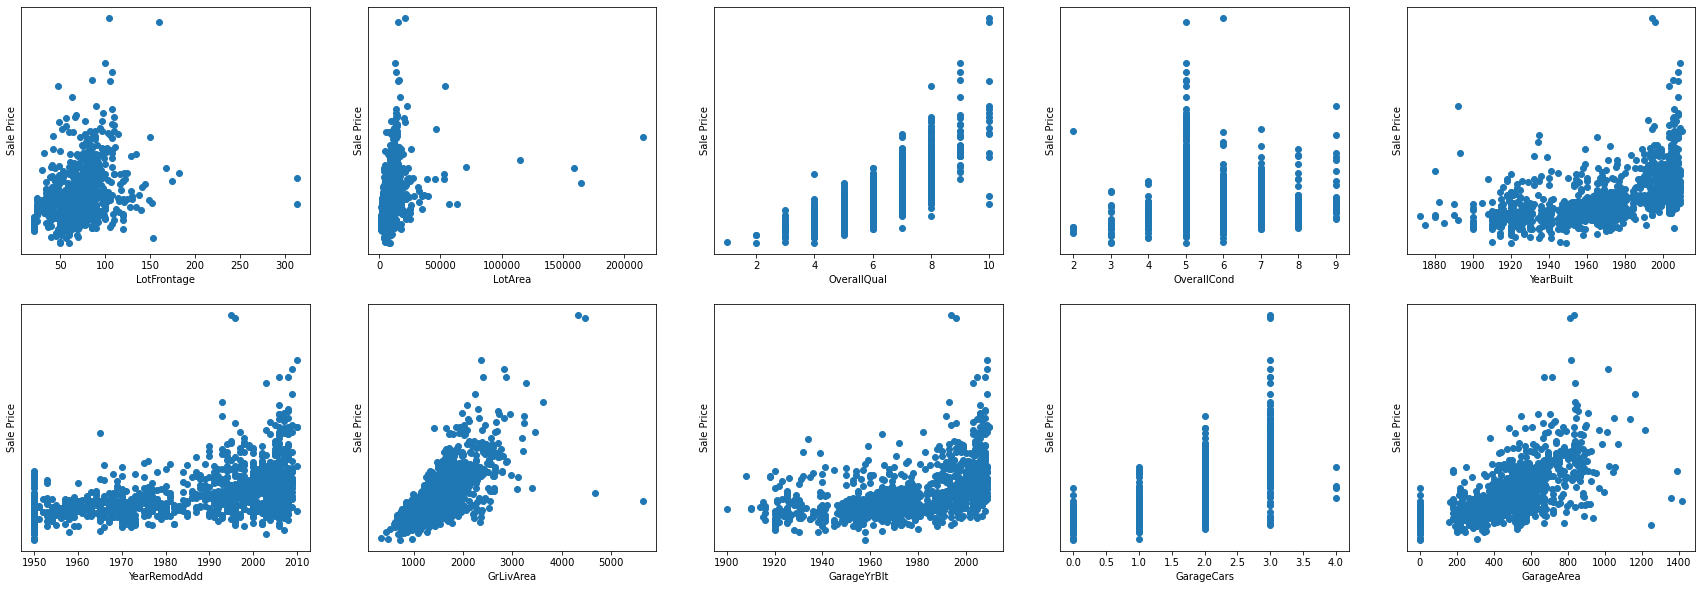

In [71]:
#Re-review the data point distribution of the variables we selected for initial linear regression

print('\033[1m' + 'Data point distribution of the variables we selected for initial Linear Regression' + '\033[0m')

int_feature_list2=["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]
k=1
plt.figure(figsize=(30,10))

for feature in int_feature_list2:
    output= ['SalePrice']
    plt.subplot(2, 5, k)
    plt.yticks([])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.scatter(X_train[feature].values, y_train[output].values)

    k=k+1
plt.show()

Corresponding Data point distribution of the variables on the test selected for initial Linear Regression

This is to make sure the test set is not significantly different from the train set.
We are cautious to not cheat at this step. But if we see any significant anomaly,
we would go back and fix the split train/test


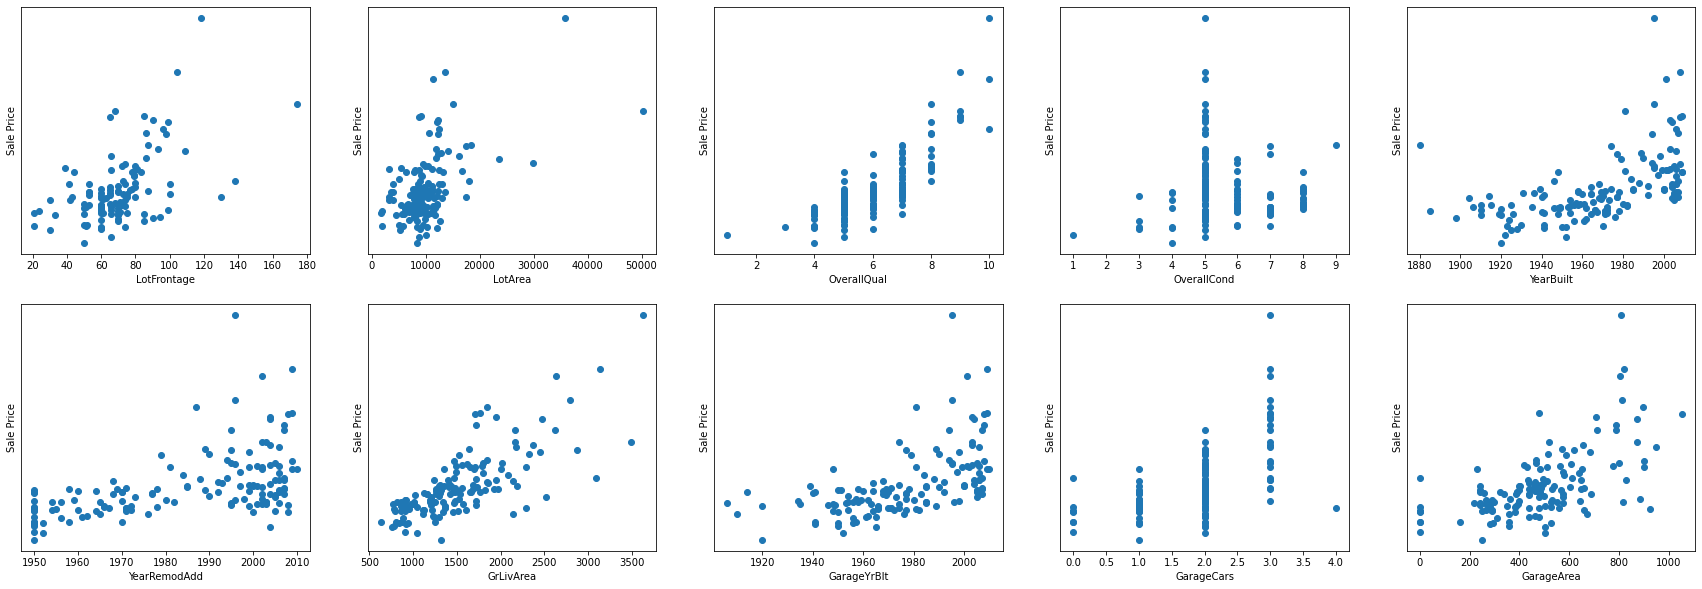

In [72]:
print('\033[1m' + 'Corresponding Data point distribution of the variables on the test selected for initial Linear Regression' + '\033[0m')
print("")
print("This is to make sure the test set is not significantly different from the train set.")
print("We are cautious to not cheat at this step. But if we see any significant anomaly,")
print("we would go back and fix the split train/test")


int_feature_list2=["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GrLivArea","GarageYrBlt","GarageCars","GarageArea"]
k=1
plt.figure(figsize=(30,10))

for feature in int_feature_list2:
    output= ['SalePrice']
    plt.subplot(2, 5, k)
    plt.yticks([])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.scatter(X_test[feature].values, y_test[output].values)
    k=k+1
    
plt.show()

#  PM Exploratory Version

In [73]:
# for features we do not need Id and we need to remove SalesPrice since
# #  it is our dependant variable
df_X = df.drop(['SalePrice', 'Id'], axis=1)
df_y = df[['SalePrice']].copy()

## Fixup some features (pre-split)
TODO do all of these pre-split

## Analyzing bathroom features impact on house price
Here we analyze the relation between the number of bathrooms and the sales price. There are four features in the dataset presenting the bathrooms, full and half bathrooms for both basements and above the ground. Here we analyze each of the features individually and then in combined form. To combine them, we verify two approaches, one considering each half-bath as .5 of a full-bath, and for the other one, we consider each bath as one no matter if it is full or half.

In [74]:
def get_bath_features_dataset(consider_half_as_full):
    # Set half-bath to half of its value
    bath_props = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
    bath_dataset = df_X[['BsmtFullBath',
                        'BsmtHalfBath', 'FullBath', 'HalfBath']].copy()
    if not consider_half_as_full:
        # Total number of bath = number of full + (number of half/2)
        bath_dataset[['BsmtHalfBath', 'HalfBath']] = bath_dataset[[
            'BsmtHalfBath', 'HalfBath']].apply(lambda x: x/2, axis=1)
    bath_dataset['total_bath'] = bath_dataset[bath_props].apply(np.sum, axis=1)
    return bath_dataset


In [75]:
def plot_features(feature_set, output_set, feature_per_row=2):
    plt.figure(figsize=(15, 20))
    number_features = len(feature_set)
    num_row = number_features // feature_per_row
    num_row = num_row if number_features % feature_per_row != 0 else num_row + 1

    k = 1
    for feature in feature_set:
        output = ['SalePrice']
        plt.subplot(num_row, feature_per_row, k)
        plt.yticks([])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.scatter(feature_set[feature].values, output_set[output].values)
        k = k+1
    plt.show()


In [76]:
def plot_features(feature_set, output_set, feature_per_row=2,
    width=15, height=20):
    plt.figure(figsize=(width, height))
    number_features = feature_set.shape[1]
    num_rows = number_features // feature_per_row
    num_rows = num_rows if number_features % feature_per_row == 0 \
         else num_rows + 1
    k = 1
    for feature in feature_set:
        output = ['SalePrice']
        plt.subplot(num_rows, feature_per_row, k)
        plt.yticks([])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.scatter(feature_set[feature].values, output_set[output].values)
        k = k+1
    plt.show()

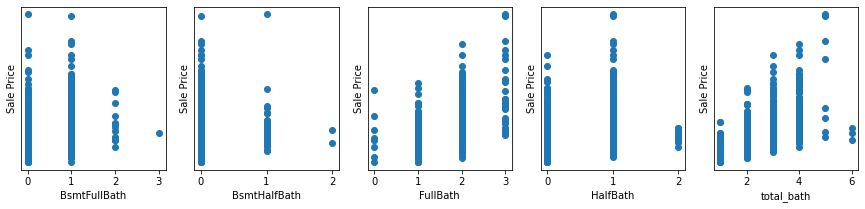

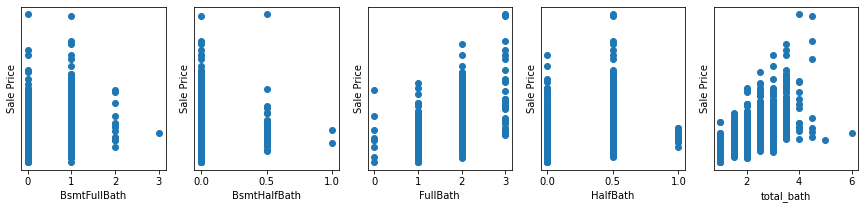

In [77]:
# bathrooms impact on price
# TODO probably better to use the train_set instead full set
def analyze_num_bath_impact():
    f_baths = get_bath_features_dataset(consider_half_as_full=True)
    plot_features(f_baths, df_y[output], feature_per_row=5, height=3)
    f_baths = get_bath_features_dataset(consider_half_as_full=False)
    plot_features(f_baths, df_y[output], feature_per_row=5, height=3)

analyze_num_bath_impact()

**Number of the bathrooms analysis result**
The number of bathroom analysis shows that using the total number of bathrooms considering half-bath as half reveals more granular details about the relation between the number of bathrooms with the sales price better than other approaches.

### Age of house at sale time, remodlled age at sale time

## Selecting a set of feature to work on (THIS IS POST BASIC ANALYSIS STEP)
These features are selected based on analysis and impact of them on the price


In [78]:
def build_featues():
    # we showed that not considering half-bath as full has better revealing factor
    f_baths = get_bath_features_dataset(consider_half_as_full=False)
    df_X['total_bath'] = f_baths['total_bath']
    # Age of house at sale time, remodlled age at sale time
    df_X['Age'] = df_X['YrSold'] - df_X['YearBuilt']
    df_X['RemodAge'] = df_X['YrSold'] - df_X['YearRemodAdd']

In [79]:
def extract_features():
    list_of_features = ['MSSubClass', 'MSZoning', 'LotArea', 'Utilities',
                        'Neighborhood', 'OverallQual', 'Age', 'RemodAge',
                        'TotRmsAbvGrd', 'KitchenQual', 'YrSold', 'MoSold', 'GrLivArea', 'total_bath']
    return df_X[list_of_features].copy()

In [80]:
build_featues()
extract_features()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallQual,Age,RemodAge,TotRmsAbvGrd,KitchenQual,YrSold,MoSold,GrLivArea,total_bath
0,60,RL,8450,AllPub,CollgCr,7,5,5,8,Gd,2008,2,1710,3.5
1,20,RL,9600,AllPub,Veenker,6,31,31,6,TA,2007,5,1262,2.5
2,60,RL,11250,AllPub,CollgCr,7,7,6,6,Gd,2008,9,1786,3.5
3,70,RL,9550,AllPub,Crawfor,7,91,36,7,Gd,2006,2,1717,2.0
4,60,RL,14260,AllPub,NoRidge,8,8,8,9,Gd,2008,12,2198,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,AllPub,Gilbert,6,8,7,7,TA,2007,8,1647,2.5
1456,20,RL,13175,AllPub,NWAmes,6,32,22,7,TA,2010,2,2073,3.0
1457,70,RL,9042,AllPub,Crawfor,7,69,4,9,Gd,2010,5,2340,2.0
1458,20,RL,9717,AllPub,NAmes,5,60,14,5,Gd,2010,4,1078,2.0


## Encoding Categorical Features

In [81]:
def encoding_features():
    working_set = extract_features()
    index_of_encoded_cols = [working_set.columns.get_loc(col) for col in [
        'MSSubClass', 'MSZoning', 'Utilities', 'Neighborhood',  'KitchenQual']]
    ct = ColumnTransformer(transformers=[(
        'encoder', OneHotEncoder(), index_of_encoded_cols)], remainder='passthrough')
    return ct.fit_transform(working_set)

## Split data into test and train sets

In [82]:
def split_data(working_set):
    return train_test_split(
        working_set, df_y, test_size=0.10, random_state=1)


## Add Feature Scaling (POST-SPLIT pre-process)

# Save the cleaned data
Here we store the cleaned data to just reload them to be used in the models and use it instead of going over the whole wrangling process everytime during the investigation.
 
**The save step should be removed for FINAL just keep the cleaing/encoding part.**


In [83]:
def clean_encode_and_save_data():
    encoded_feaures = encoding_features()
    X_train, X_test, y_train, y_test = split_data(encoded_feaures)
    # the save part could be removed for final
    sio.mmwrite("X_train.mtx", X_train)
    pd.DataFrame(X_test.todense()).to_csv('X_test.csv', index=False)
    y_train.to_csv('y_train.csv', index=False)
    y_test.to_csv('y_test.csv', index=False)


In [84]:
clean_encode_and_save_data()

# Start of the Analysis

In [85]:
# model fit
lm = LinearRegression(fit_intercept = True)
lm.fit(selected_array_train, y_train.values.ravel())
lm_yhat = lm.predict(selected_array_test)
#print(lm.intercept_)
#print(lm.coef_)
print ('Estimated function: y = %.2f + %.2fx' %(lm.intercept_, lm.coef_[0]))

Estimated function: y = -1107633.61 + 40.67x


Estimated function: y = 39564.48 + 0.77x


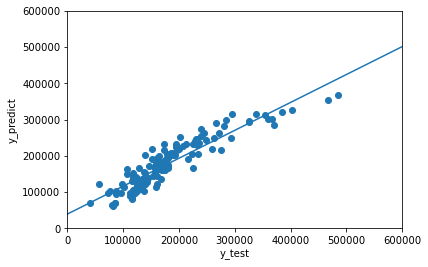

In [86]:
#plot y_test and y_predict to make sure everything looks good visually and is not completely off

plt.scatter(y_test,lm_yhat)

plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.xlim(0,600000)
plt.ylim(0,600000)

lm1 = LinearRegression(fit_intercept = True)
lm1.fit(y_test,lm_yhat)
print ('Estimated function: y = %.2f + %.2fx' %(lm1.intercept_, lm1.coef_[0]))

x=np.linspace(0, 600000)
y=39564.48 + 0.77*x
plt.plot(x,y)

#plt.show()

# Furtherwork